## Data Importing Leanding Club

In [1]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the CSV
loan = pd.read_csv('loan.csv')

In [3]:
#Check the shape
print(loan.shape)

(39717, 111)


###  Data cleaning (cleaning missing values, removing redundant columns etc.)

In [4]:
#Check whether column has null values
loan.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [5]:
#Remove the columns which has all null values
loan = loan.dropna(how='all')
loan = loan.dropna(how='all', axis=1)
print(loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1    

In [6]:
#Check if any column is duplicated. If there is any lets remove it
#I dont see any values is duplicated.
loan.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [7]:
#loan.head()
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
#remove unwanted columns
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record","collections_12_mths_ex_med","tax_liens"], axis = 1, inplace = True)


In [9]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [10]:
#The number of columns reduced to 30
loan.shape

(39717, 28)

<AxesSubplot:>

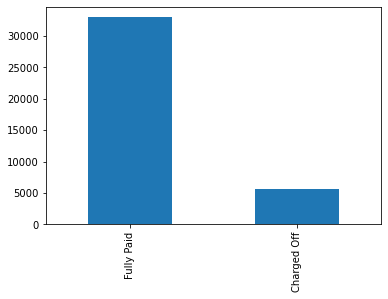

In [11]:
#Drop the rows which is not needed. The row with the Current loan_status doenst give any significant information. 
loan = loan[loan.loan_status != 'Current']
loan['loan_status'].value_counts().head(10).plot.bar()

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  pymnt_plan            38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                

In [13]:
#Adding missing values for the emp length columns emp_length
loan.emp_length.value_counts()
loan.emp_length.isna().sum()


1033

In [14]:
#Add the mode value in the empty rows for emp_length column
loan['emp_length'] = loan['emp_length'].fillna(loan['emp_length'].mode()[0])
loan.emp_length.isna().sum() 
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [15]:
#Finding the outlier on the important columns Loan amount , annual_inc
#Find the Quantile data. We will remove all the data above 95%
quantile_annual_inc = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
print(quantile_annual_inc)
#

0.50    58868.00
0.75    82000.00
0.90   115000.00
0.95   140004.00
0.97   165000.00
0.98   187000.00
0.99   234144.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

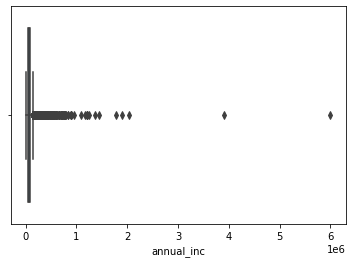

In [16]:
sns.boxplot(loan.annual_inc)

In [17]:
#Tried with 99%. The outliers are more. So going with 95%
annual_inc_95 = loan['annual_inc'].quantile(0.95)
#print(annual_inc_95)
loan = loan[loan.annual_inc <= annual_inc_95]
#loan = loan[loan.annual_inc <= 140004.0]

<AxesSubplot:xlabel='annual_inc'>

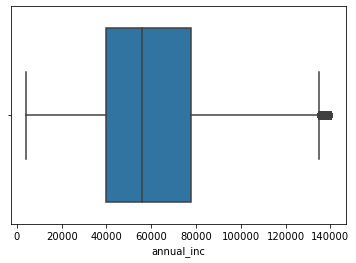

In [18]:
#The box graph looks good.
sns.boxplot(loan.annual_inc)

<AxesSubplot:xlabel='loan_amnt'>

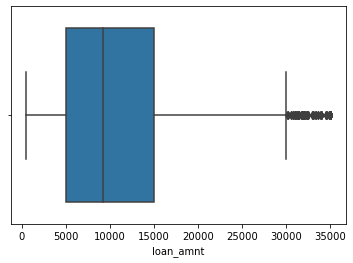

In [19]:
#Similary do this for the loan amount
#annual_inc_95 = loan['loan_amt'].quantile(0.95)
#loan = loan[loan.annual_inc <= annual_inc_95]

#The box graph looks good.
sns.boxplot(loan.loan_amnt)

## Analying the data

* Purpose 

<AxesSubplot:>

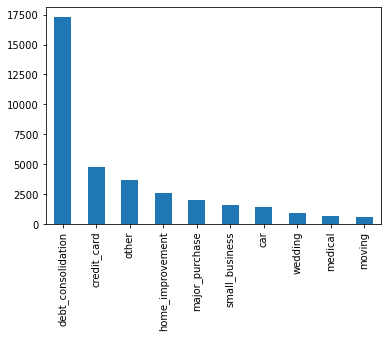

In [20]:
#Top 3 categories who takes loan -  Debt_Consolidation, Credit_Card and Others.
loan['purpose'].value_counts().head(10).plot.bar()

<AxesSubplot:xlabel='count', ylabel='purpose'>

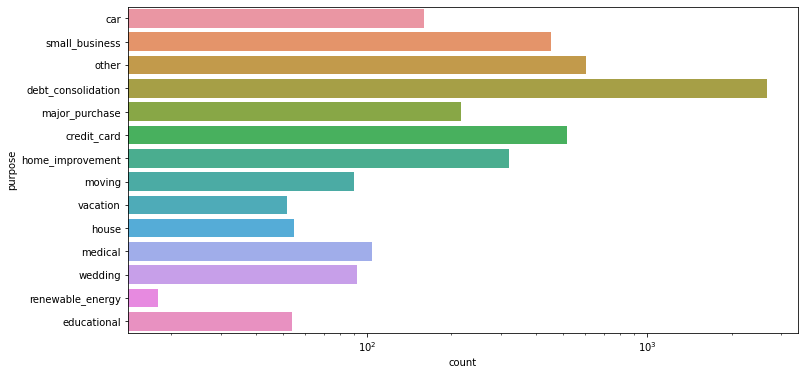

In [21]:
#Check which categories has chargeoff more. Debt consolidation has more Charged off compare to others
f, axs = plt.subplots(figsize=(12,6))
axs.set(xscale = 'log')

sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])


* Home_Owner

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

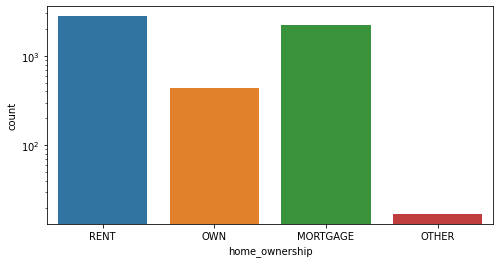

In [22]:
#People who are having Own house are less likely to be defaulted. Encourage giving loans to people having own house
fig, axs = plt.subplots(figsize = (8,4))
axs.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

   * Verification Status

<AxesSubplot:xlabel='count', ylabel='verification_status'>

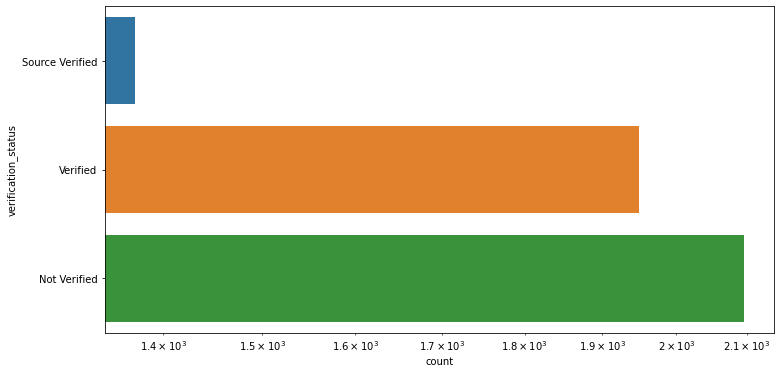

In [23]:
#It is always good to verify the source. Whoever income verfied, they are very less likely to be defaulted
#loan['verification_status'].unique()
#print(loan.groupby("verification_status")["loan_status"].count())
#Consolidate Verified and Source Verified
f, axs = plt.subplots(figsize=(12,6))
axs.set(xscale = 'log')
sns.countplot(y='verification_status', data=loan[loan['loan_status']=='Charged Off'])

In [24]:
#loan.int_rate 
#
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

loan['annual_income_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['1k-30k','30k-60k','60k-90k','90k-120k','120k-150k'])
loan['intrest_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels =['5-9%','9-13','13-17%','17-21%','21-24%'])

<AxesSubplot:xlabel='annual_income_groups', ylabel='count'>

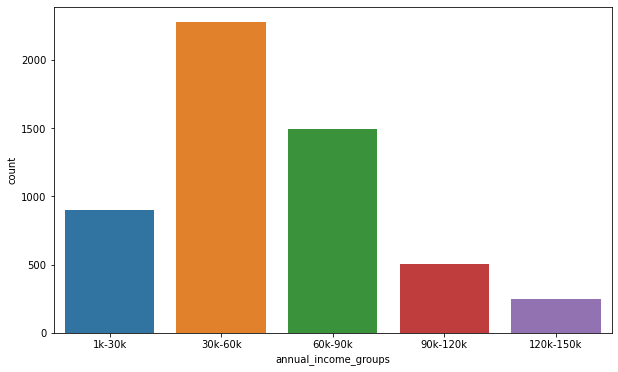

In [25]:
#Higher the salary lower the defulter. The group who gets salary within the 31K-60K are more likey to be a defulter
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_income_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='emp_length_group', ylabel='count'>

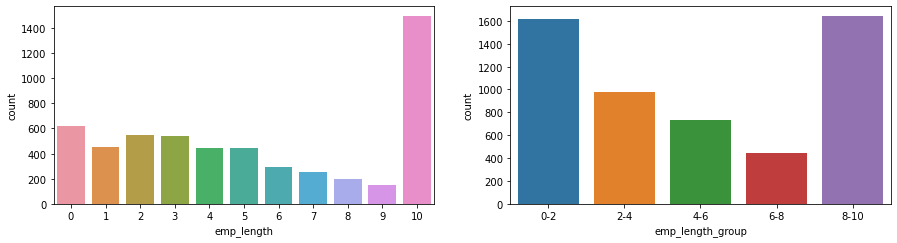

In [34]:
#Less experience or Higher experience employees more likely to be defaulter

fig, axs = plt.subplots(figsize = (15,8))
axs.set(yscale = 'log')
loan['emp_length_group'] = pd.cut(loan['emp_length'], bins=5,precision =0,labels =['0-2','2-4','4-6','6-8','8-10'])
plt.subplot(221)
sns.countplot(x='emp_length', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='emp_length_group', data=loan[loan['loan_status']=='Charged Off'])


<AxesSubplot:xlabel='intrest_groups', ylabel='count'>

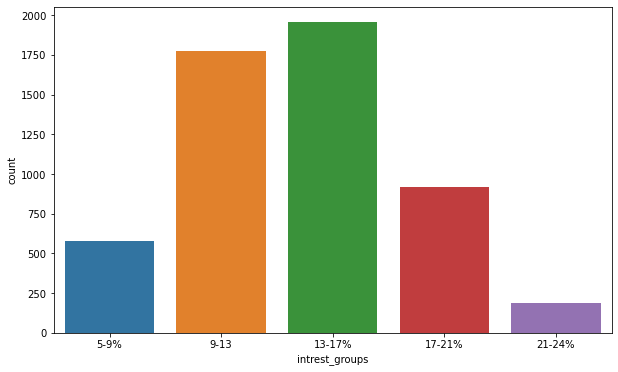

In [42]:
#If loan interest rate is given between 5-9% the defaulters are less
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='intrest_groups', data=loan[loan.loan_status == 'Charged Off'])
#print(loan.intrest_groups)

In [35]:
loan.head()
loan['issue_d']
#issueMY = loan['issue_d'].str.split('-', expand=True)
#loan['issued_mnth'] = '20' + issueMY[1]
#loan['issued_year'] = issueMY[0]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 36654, dtype: object

<AxesSubplot:xlabel='issued_year', ylabel='count'>

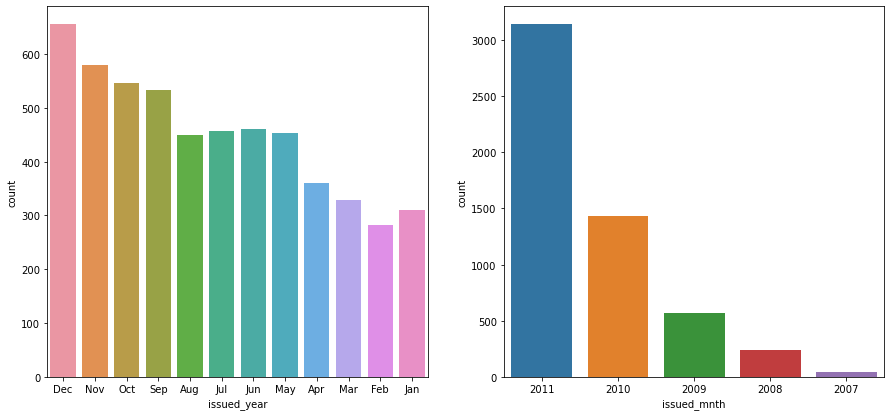

In [29]:
#As per excel issue_d column seems to be MOnth-Year. In Data dictionary also it is not clearly mentioned. 
#With the Analysis, the loan taken in the year 2011 has more defaulter

plt.figure(figsize=(15,15))
plt.subplot(222)
sns.countplot(x='issued_mnth', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(221)
sns.countplot(x='issued_year', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='term,loan_status'>

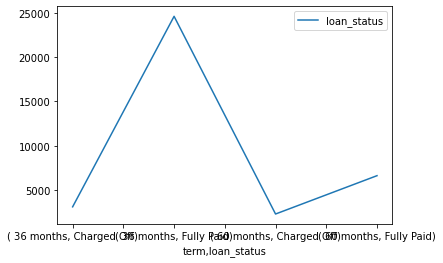

In [61]:
#Higher the salary lower the defulter. The group who gets salary within the 31K-60K are more likey to be a defulter
#fig, ax = plt.subplots(figsize = (10,6))
#sns.countplot(x='term', data=loan[loan.loan_status == 'Charged Off']/loan['loan_status'].count())
#loan.groupby(loan['term']) 

loan.groupby(['term','loan_status'])['loan_status'].count().plot(legend=True)